## Titanic - Machine Learning from Disaster

### Titanic Dataset

https://www.kaggle.com/competitions/titanic/data

#### Goal is to Predict Which Passangers Survived the Titanic 
***

<br> 

### Setup

In [68]:
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Fancier, statistical plots.
import seaborn as sns

# Functions creating iterators for efficient looping
from itertools import combinations

In [69]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Using seaborn style
plt.style.use('seaborn')

<br>

#### Uploading and Enhancing the Titanic Dataset

*** 

In [70]:
df = pd.read_csv("https://raw.githubusercontent.com/Pasha-Akito/Titanic_Machine-Learning-from-Disaster/main/Data/train.csv")

In [71]:
# Using df.head() instead of df as it shows a more compact list of rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Explaining the Column Names

| Variable      | Definition | Key |
| ----------- | ----------- | ----------- |
| PassengerId      | Passenger ID       |  |
| Survived      | Survival       | 0 = No, 1 = Yes |
| Pclass   | Ticket Class        | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Sex      | Sex       | 0 = Male, 1 = Female  |
| Age   | Age in Years        |  |
| SibSp      |          	# of siblings / spouses aboard the Titanic	       |  |
| Parch   | 	# of parents / children aboard the Titanic        |  |
| Ticket      | Ricket Number       |  |
| Fare   | Passenger Fare        |  |
| Cabin   | Cabin Number        |  |
| Embarked   | Port of Embarkation        | C = Cherbourg, Q = Queenstown, S = Southampton |

In [72]:
# Changing Sex Column values into male = 0 and female = 1
df.loc[df["Sex"] == "male", "Sex"] = 0
df.loc[df["Sex"] == "female", "Sex"] = 1

In [73]:
# Checking the column afterwards
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [74]:
# Summary statistics
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
# Checking for Missing Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [76]:
# // TODO
# Figure out what to do with Nulls
# Here are thee following ideas
# Remove Age Nulls
# Make Age Nulls the mean
# Do nothing about the Nulls

### Data Visualisation
***

In [77]:
df.loc[df['Survived'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.00,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.00,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.00,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",1,55.00,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,C


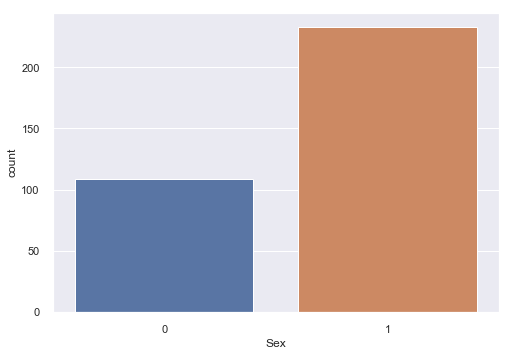

In [84]:
# Distribution of burned area
survived_df = df.loc[df['Survived'] == 1]
sns.countplot(data = survived_df, x = survived_df['Sex'] )

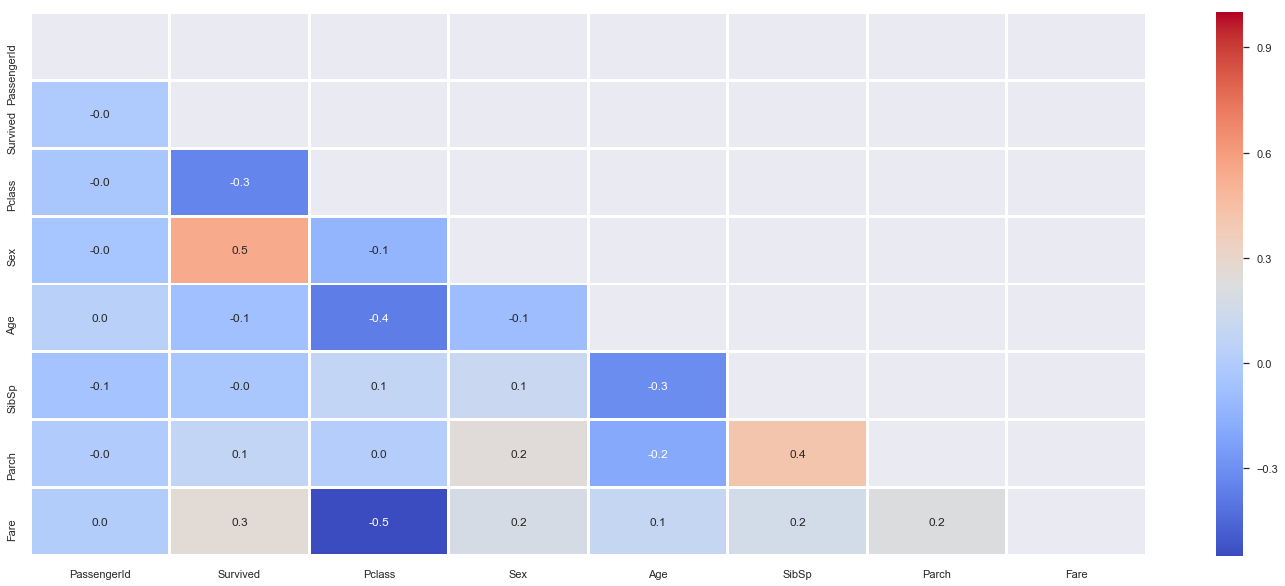

In [85]:
# Using heatmap to plot all the features against each other
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.set(font_scale=1)
f, ax = plt.subplots(figsize = (25, 10))
sns.heatmap(df.corr(), annot = True, linewidths=2, fmt = ".1f", ax=ax, cmap = "coolwarm", mask = mask)

plt.show()

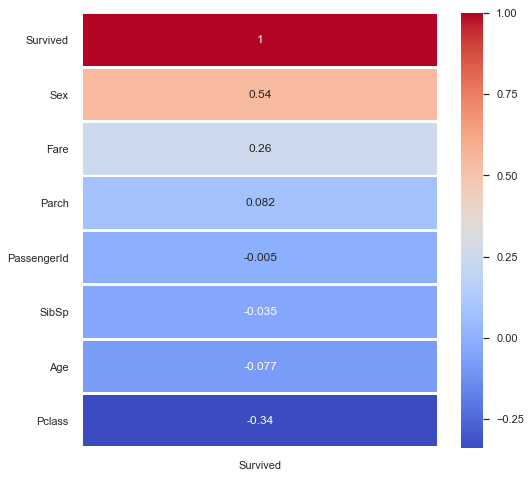

In [86]:
# Correlating the dataset with temp to better see information
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(df.corr()[['Survived']].sort_values(by='Survived', ascending=False), annot = True, linewidths=2, ax=ax, cmap = "coolwarm",)

plt.show()